In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('r3 raw attendance 2025.csv')

In [3]:
df[df['Class']=='Class'] #finding those 2 weird rows in the middle of the excel sheet

,Class,Date,Student,Present,Absent,Tardy,Unnamed: 6
46,Class,Date,Student,Present,Absent,Tardy,NaN
105,Class,Date,Student,Present,Absent,Tardy,NaN


In [4]:
df=df.drop((df[df['Class']=='Class']).index) #deleting those weird 2 rows in the middle which are a repetition of the column titles.

In [5]:
df.head()

,Class,Date,Student,Present,Absent,Tardy,Unnamed: 6
0,2:30 pm sesh,2025-03-01 to 2025-03-29,Advitha Manish,3,0,0,NaN
1,2:30 pm sesh,2025-03-01 to 2025-03-29,Akshath Shirolkar,6,0,0,NaN
2,2:30 pm sesh,2025-03-01 to 2025-03-29,Akshay Gudur,1,0,0,NaN
3,2:30 pm sesh,2025-03-01 to 2025-03-29,Akshay Nair,3,0,0,NaN
4,2:30 pm sesh,2025-03-01 to 2025-03-29,Akshith Rao,2,0,0,NaN


In [6]:
df=df[['Class','Student','Present']]
df['Present']=df['Present'].astype(int) #because before we deleted those rows, pandas thought it was a string row, and hence the columns had strings

In [ ]:
fin=df.groupby(by='Student')['Present'].sum().sort_values().reset_index(name='Sessions_Attended') #this sums their attendance from the different slots
fin
fin.to_csv('r3 final attendance.csv')
#this csv file created has everyone's total attendance


#open the csv file and decide where to draw the line.

In [ ]:
shenanigans=fin[fin['Sessions_Attended']>=3]  #3 or more sessions to pass recruitments
names=shenanigans['Student'].tolist()
for i in names:
    print(i)
#the names will get printed in ascending order of attendance
#this printing is unnecessary.To display the people who passed recruitments, just use the next code block.

Narendra Kanchi
Nishitha Ande Lakshmi
Srihari 
Skanda TA Upadhya
Mehal B
Meghana A
Manasvi G V
Vedant AN
Anushka Prasad
Jhanvi KP
Harsh Chaturvedi
Spandana K V
Vivyn Krishnaa
Namitha R
Aparajitha Rajesh
Vrunda C
Vibha G
Pratham S Reddy
Sachin R
Ayushi Srivastava
Baandhavi 
Shirali R
Spoorthi T
Akshith Rao
Preksha CM
Yashas Vijay
Advitha Manish
Rithin Nagaraj
Riya Sannadal
Nithyaanagha M
Shruthi Vudathu
Nanditha S Nair
Samarth Kotian
Rhrishi R G
Ananyaa Harish
Jahnavi Moka Jahnavi
Akshath Shirolkar
Ashutosh Akkalakote
Shree Verdhan M
Tusti S
Anoop Marthnady
Deepthi Shashidar
Varun H
Tanmayi Shanbhogue
Akshay Nair
Palash Agarwal
Anjali Arun
Mahfuza MH


In [9]:

names.sort()

for i in names:
    print(i)
    #just click the 3 dots and click copy cell output on vscode to get the proper output names

Advitha Manish
Akshath Shirolkar
Akshay Nair
Akshith Rao
Ananyaa Harish
Anjali Arun
Anoop Marthnady
Anushka Prasad
Aparajitha Rajesh
Ashutosh Akkalakote
Ayushi Srivastava
Baandhavi 
Deepthi Shashidar
Harsh Chaturvedi
Jahnavi Moka Jahnavi
Jhanvi KP
Mahfuza MH
Manasvi G V
Meghana A
Mehal B
Namitha R
Nanditha S Nair
Narendra Kanchi
Nishitha Ande Lakshmi
Nithyaanagha M
Palash Agarwal
Pratham S Reddy
Preksha CM
Rhrishi R G
Rithin Nagaraj
Riya Sannadal
Sachin R
Samarth Kotian
Shirali R
Shree Verdhan M
Shruthi Vudathu
Skanda TA Upadhya
Spandana K V
Spoorthi T
Srihari 
Tanmayi Shanbhogue
Tusti S
Varun H
Vedant AN
Vibha G
Vivyn Krishnaa
Vrunda C
Yashas Vijay


In [10]:
distribution=fin.groupby(by='Sessions_Attended')['Student'].count().reset_index(name='Students')
distribution


,Sessions_Attended,Students
0,1,15
1,2,6
2,3,12
3,4,5
4,5,5
5,6,8
6,7,5
7,8,1
8,9,3
9,10,3


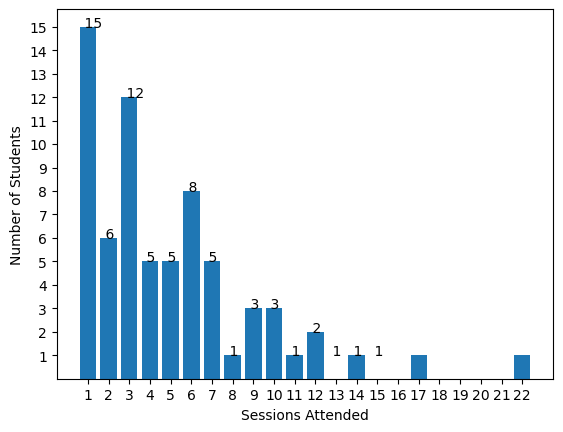

In [11]:
x=distribution['Sessions_Attended']
y=distribution['Students']

plt.yticks(np.arange(y.min(), y.max()+1, 1))
plt.xticks(np.arange(x.min(), x.max()+1, 1))
plt.bar(x,y)
plt.xlabel('Sessions Attended')
plt.ylabel('Number of Students')

def add_labels(x, y):
    for i in range(0,len(x)):
            plt.text(i,y[i],'    ' + str(y[i]))
add_labels(x,y)


plt.show()


God knows why the numbers are unaligned with their bars.